# Homework 4 

1. Acquire power data (https://www.bmreports.com/bmrs/?q=demand/rollingsystemdemand/historic) for 7 days (Include each day of the week)

1. Create two bar graphs of the power consumption per hour.

    * One bar graph has 24 bars showing the average consumption
    * One bar graph has 7x24 bars showing the average demand 

1. Your solution should be committed in your Week04 folder.

Graphs must have appropriate labels and there should not be anything extra cluttering. 

In [1]:
import pandas as pd
from datetime import *
import matplotlib.pyplot as plot

In [2]:
df = pd.read_csv("RollingSystemDemand_20220302_0350.csv")
df.head()

,HDR,ROLLING SYSTEM DEMAND
VD,20220221000000,24968.0
VD,20220221000500,24967.0
VD,20220221001000,24767.0
VD,20220221001500,24936.0
VD,20220221002000,24922.0


In [3]:
df.dropna(inplace=True)

In [4]:
df['HDR'] = pd.to_datetime(df['HDR'], format= "%Y%m%d%H%M%S")

In [5]:
df["HDR"]

VD   2022-02-21 00:00:00
VD   2022-02-21 00:05:00
VD   2022-02-21 00:10:00
VD   2022-02-21 00:15:00
VD   2022-02-21 00:20:00
             ...        
VD   2022-02-27 22:15:00
VD   2022-02-27 22:20:00
VD   2022-02-27 22:25:00
VD   2022-02-27 22:30:00
VD   2022-02-27 22:35:00
Name: HDR, Length: 2000, dtype: datetime64[ns]

In [6]:
df['new_date'] = [d.date() for d in df['HDR']]
df['new_time'] = [d.time() for d in df['HDR']]

In [7]:
df.head()

,HDR,ROLLING SYSTEM DEMAND,new_date,new_time
VD,2022-02-21 00:00:00,24968.0,2022-02-21,00:00:00
VD,2022-02-21 00:05:00,24967.0,2022-02-21,00:05:00
VD,2022-02-21 00:10:00,24767.0,2022-02-21,00:10:00
VD,2022-02-21 00:15:00,24936.0,2022-02-21,00:15:00
VD,2022-02-21 00:20:00,24922.0,2022-02-21,00:20:00


In [8]:
df["ROLLING_SYSTEM_DEMAND"] = df["ROLLING SYSTEM DEMAND"]
df.tail()

,HDR,ROLLING SYSTEM DEMAND,new_date,new_time,ROLLING_SYSTEM_DEMAND
VD,2022-02-27 22:15:00,28515.0,2022-02-27,22:15:00,28515.0
VD,2022-02-27 22:20:00,28324.0,2022-02-27,22:20:00,28324.0
VD,2022-02-27 22:25:00,28104.0,2022-02-27,22:25:00,28104.0
VD,2022-02-27 22:30:00,28014.0,2022-02-27,22:30:00,28014.0
VD,2022-02-27 22:35:00,28017.0,2022-02-27,22:35:00,28017.0


In [9]:
df.drop(columns="ROLLING SYSTEM DEMAND", inplace=True)

In [10]:
df.head(290)

,HDR,new_date,new_time,ROLLING_SYSTEM_DEMAND
VD,2022-02-21 00:00:00,2022-02-21,00:00:00,24968.0
VD,2022-02-21 00:05:00,2022-02-21,00:05:00,24967.0
VD,2022-02-21 00:10:00,2022-02-21,00:10:00,24767.0
VD,2022-02-21 00:15:00,2022-02-21,00:15:00,24936.0
VD,2022-02-21 00:20:00,2022-02-21,00:20:00,24922.0
...,...,...,...,...
VD,2022-02-21 23:45:00,2022-02-21,23:45:00,26635.0
VD,2022-02-21 23:50:00,2022-02-21,23:50:00,26480.0
VD,2022-02-21 23:55:00,2022-02-21,23:55:00,26629.0
VD,2022-02-22 00:00:00,2022-02-22,00:00:00,26741.0


In [11]:
df["hours"] = df["new_time"]
for i in range(0, len(df["new_time"])):
    df['hours'][i] = df['new_time'][i].strftime("%H")

C:\Users\VIRALJ~1\AppData\Local\Temp/ipykernel_19920/2290153565.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hours'][i] = df['new_time'][i].strftime("%H")


## Graph 1
#### Bar graph having 24 bars showing the average consumption

In [12]:
grouped_df_time = df.groupby("hours")
grouped_df_time.describe()

ROLLING_SYSTEM_DEMAND                                                \
                      count          mean          std      min       25%   
hours                                                                       
00                     84.0  26486.535714   858.762832  24767.0  25967.75   
01                     84.0  26463.392857   878.221780  25107.0  25643.00   
02                     84.0  25776.333333   891.735418  24123.0  24986.75   
03                     84.0  25018.130952  1011.987080  23417.0  24076.75   
04                     84.0  24821.511905  1037.066803  23473.0  24105.25   
05                     84.0  25308.380952  1104.654685  23594.0  24509.50   
06                     84.0  27783.488095  2221.174906  24406.0  25606.75   
07                     84.0  31097.011905  3174.499579  25272.0  27501.00   
08                     84.0  33066.726190  3399.550383  26308.0  28620.50   
09                     84.0  33439.619048  3438.919163  27595.0  28785.75   
10                     84.0  32576.702381  3495.859457  26610.0  27650.50   
11                     84.0  31760.285714  3562.600724  25363.0  26932.50   
12                     84.0  31337.166667  3833.115747  24718.0  26071.50   
13                     84.0  30798.059524  3917.107002  23974.0  25193.75   
14                     84.0  30785.607143  3642.647217  24557.0  25758.25   
15                     84.0  31591.809524  3243.500650  25599.0  27888.50   
16                     84.0  34444.166667  3040.104448  28090.0  32026.50   
17                     84.0  37811.476190  2649.224908  31010.0  36003.00   
18                     84.0  39071.119048  2284.156011  34972.0  36613.50   
19                     84.0  37515.726190  2311.020462  32681.0  35304.50   
20                     84.0  35411.571429  2115.665068  30573.0  34035.75   
21                     84.0  32420.404762  2201.564696  28166.0  30711.50   
22                     80.0  29425.862500  1572.382661  25857.0  28489.25   
23                     72.0  27120.388889   912.185297  25608.0  26166.50   

                                   
           50%       75%      max  
hours                              
00     26540.5  27048.50  28198.0  
01     26408.0  27277.25  27898.0  
02     25853.0  26679.25  27155.0  
03     25092.5  25670.25  26857.0  
04     24626.0  25315.25  27008.0  
05     25068.0  25813.75  28496.0  
06     27793.0  29456.75  32409.0  
07     32100.5  33501.75  35746.0  
08     34539.0  35634.00  36497.0  
09     35235.5  36038.50  36730.0  
10     34436.0  34873.75  35854.0  
11     33664.5  34111.50  35277.0  
12     33488.0  33941.00  34544.0  
13     32607.0  33964.75  34254.0  
14     32222.0  33800.25  34517.0  
15     32734.5  34185.25  36061.0  
16     35385.0  36797.00  38961.0  
17     38593.5  39722.00  41998.0  
18     40099.5  40591.00  42221.0  
19     38437.5  39413.25  40479.0  
20     36068.5  37029.25  38200.0  
21     32814.5  34012.00  36531.0  
22     29592.5  30519.50  32946.0  
23     27084.0  27821.25  29122.0

In [13]:
grouped_by_hour_df = df.groupby(["hours"]).ROLLING_SYSTEM_DEMAND.mean()
grouped_by_hour_df

hours
00    26486.535714
01    26463.392857
02    25776.333333
03    25018.130952
04    24821.511905
05    25308.380952
06    27783.488095
07    31097.011905
08    33066.726190
09    33439.619048
10    32576.702381
11    31760.285714
12    31337.166667
13    30798.059524
14    30785.607143
15    31591.809524
16    34444.166667
17    37811.476190
18    39071.119048
19    37515.726190
20    35411.571429
21    32420.404762
22    29425.862500
23    27120.388889
Name: ROLLING_SYSTEM_DEMAND, dtype: float64

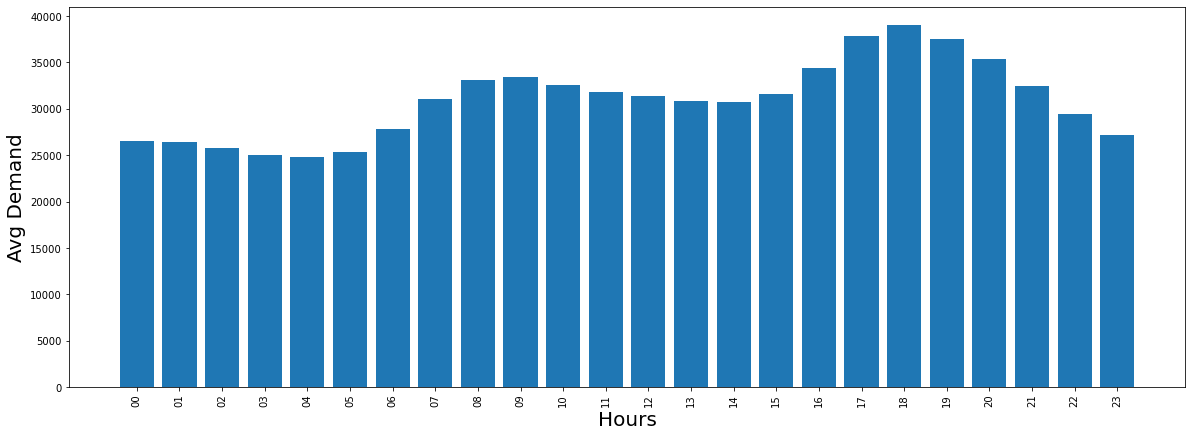

In [14]:
import matplotlib.pyplot as plt

# figure size
plt.figure(figsize = (20, 7))

# Histogram
plt.bar(grouped_by_hour_df.index, grouped_by_hour_df.values)

# x-label
plt.xlabel('Hours', fontsize=20)

# y-label
plt.ylabel('Avg Demand', fontsize=20)

plt.xticks(rotation = 90)

plt.show()

## Graph 2
#### One bar graph has 7x24 bars showing the average demand

<AxesSubplot:xlabel='new_date,hours'>

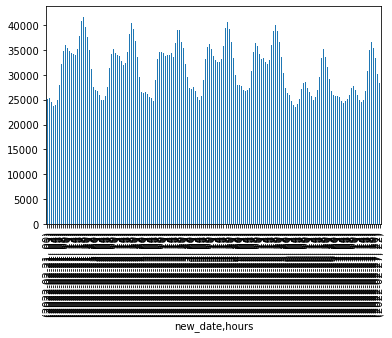

In [15]:
grouped_df = df.groupby(["new_date", "hours"]).ROLLING_SYSTEM_DEMAND.mean().plot.bar()
grouped_df

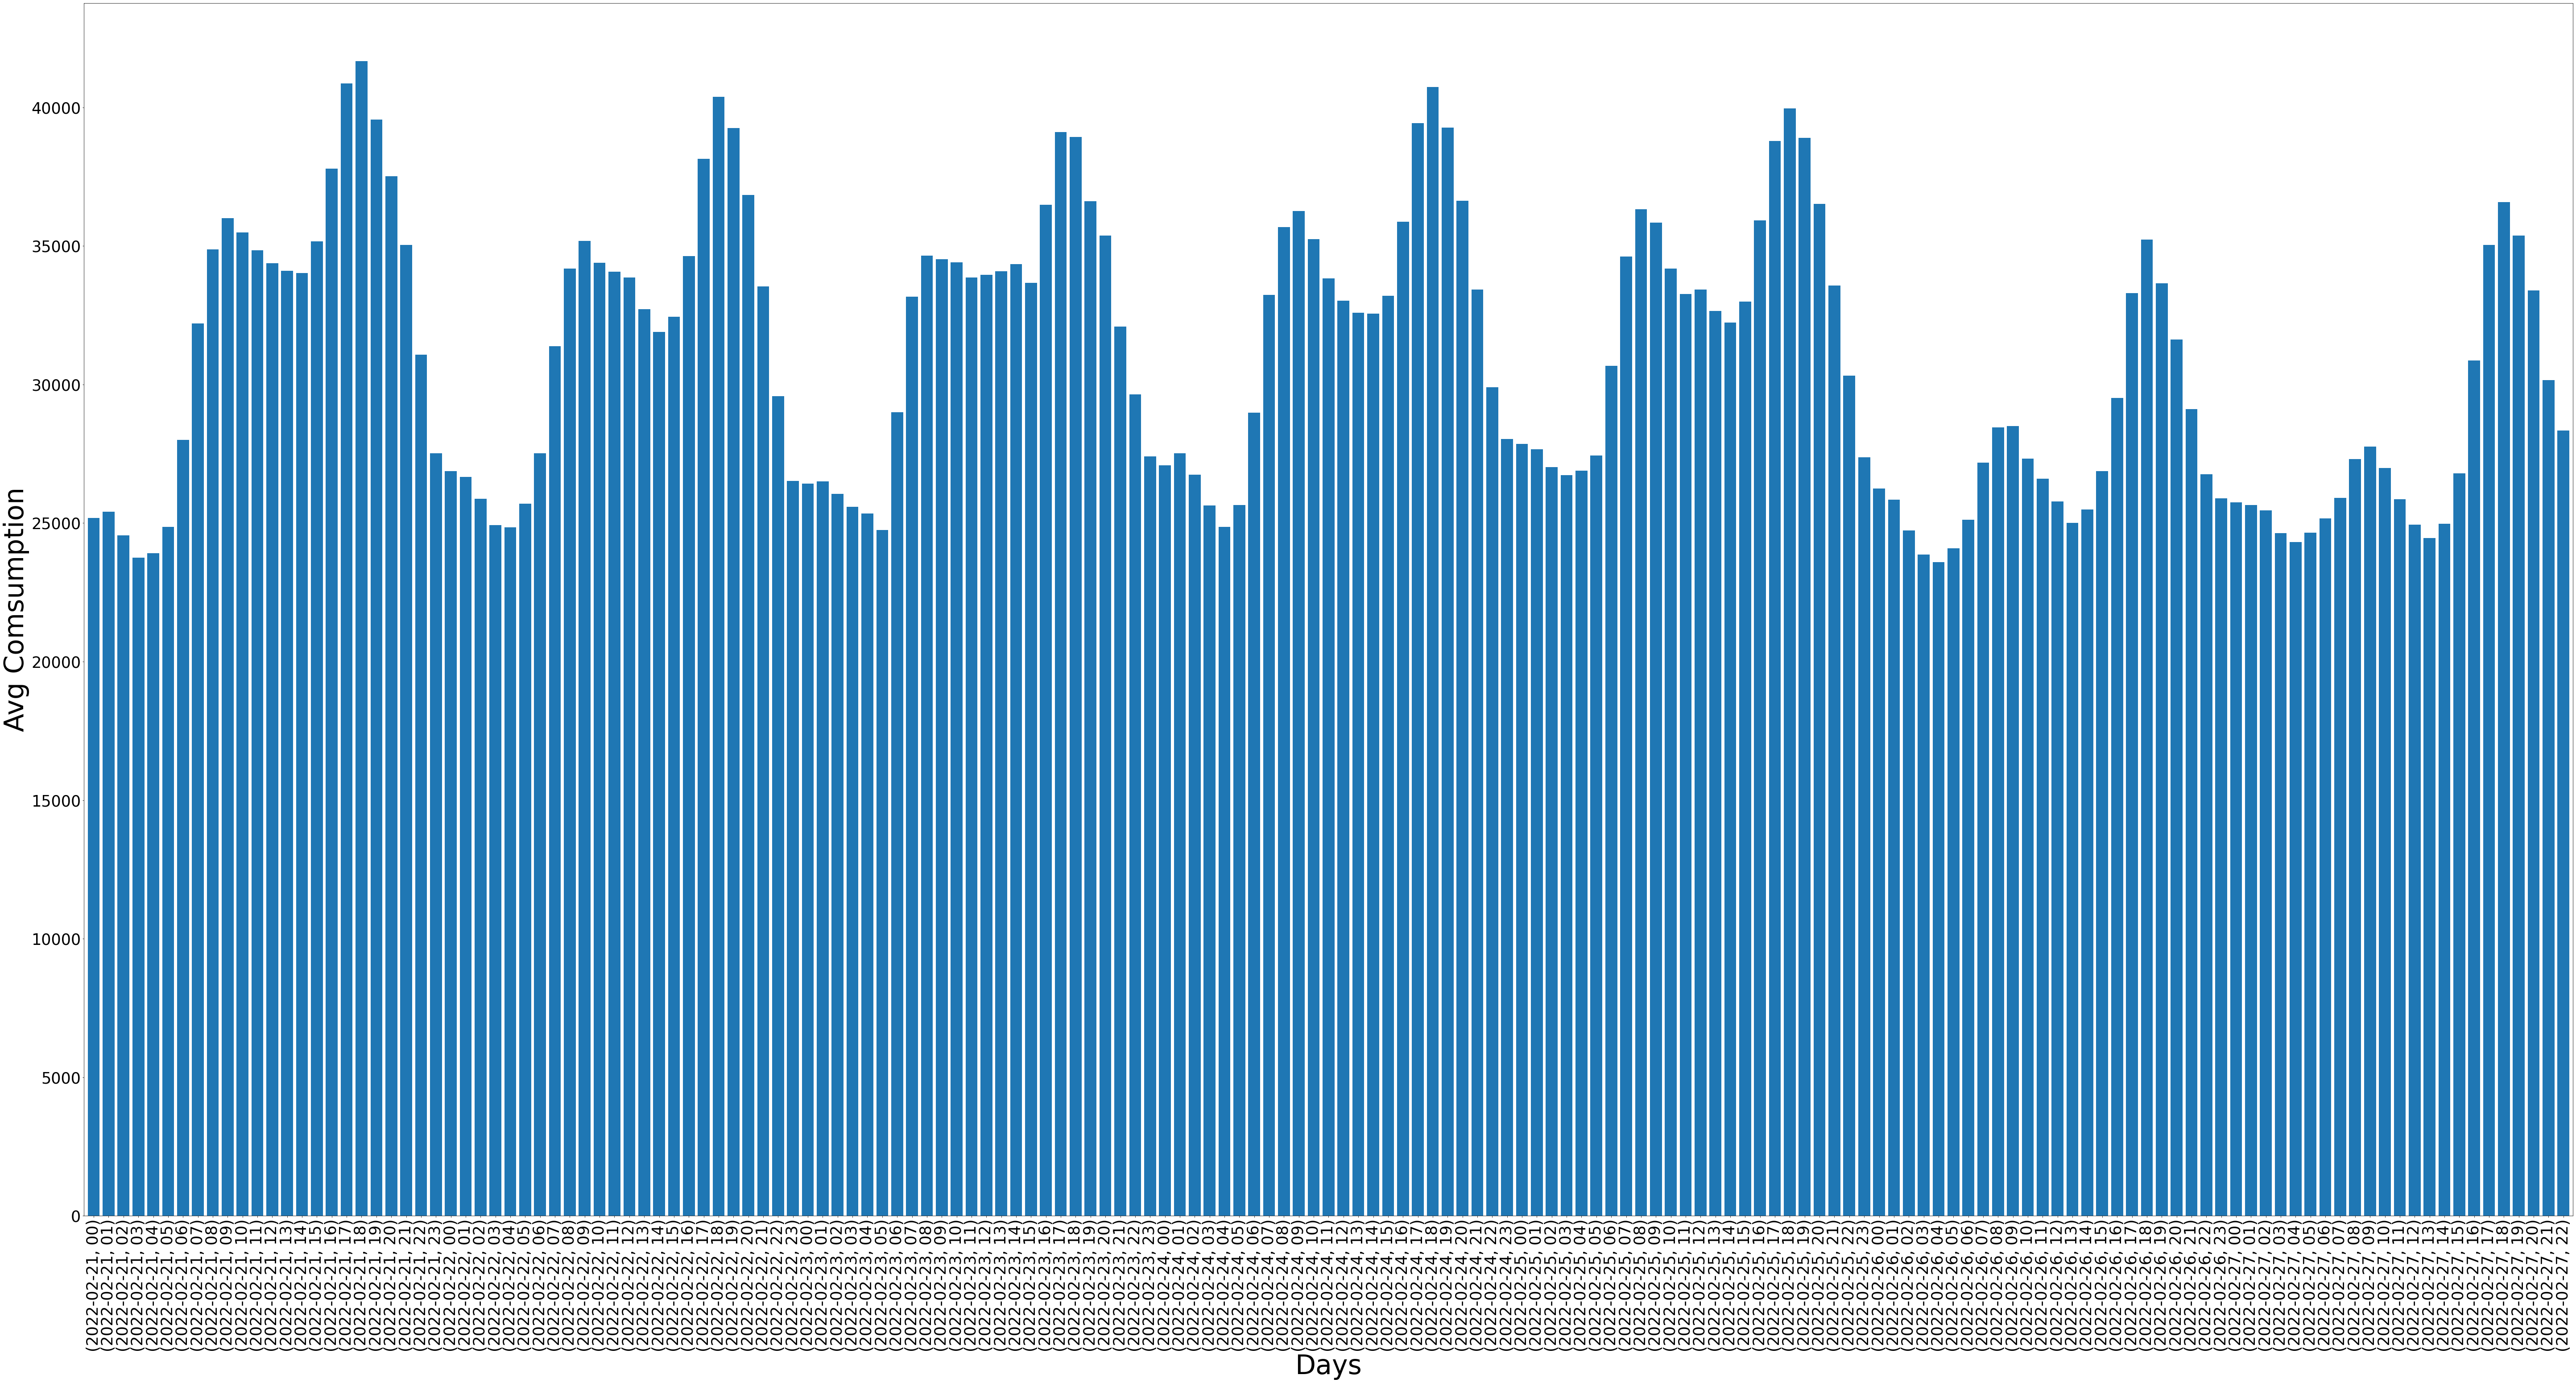

In [16]:
df.groupby(["new_date", "hours"]).ROLLING_SYSTEM_DEMAND.mean().plot.bar(figsize=(100, 50), fontsize=35, width=0.8)
plt.xlabel('Days', fontsize=60)
plt.ylabel('Avg Comsumption', fontsize=60)
plt.show()